### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
train.shape

(550068, 12)

In [4]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
test.shape

(233599, 11)

In [6]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [7]:
train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index = True, sort=False)

train.shape, test.shape, data.shape

((550068, 13), (233599, 12), (783667, 13))

In [8]:
# Check if the data has null values

data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [9]:
cols = data.columns.drop(['User_ID','Product_ID'])
cols

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source'],
      dtype='object')

In [10]:
data['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

C:\Users\dipkumar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


Text(0, 0.5, 'Purchase')

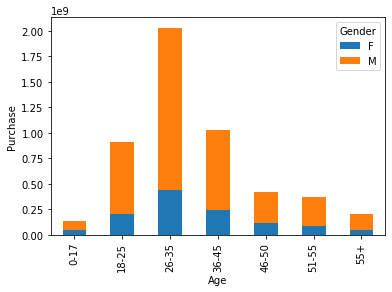

In [11]:
group = ('Age','Gender')
data.groupby(group)['Purchase'].sum().sort_values().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Purchase')

In [12]:
# Check which city spent most

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [13]:
data.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
data['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

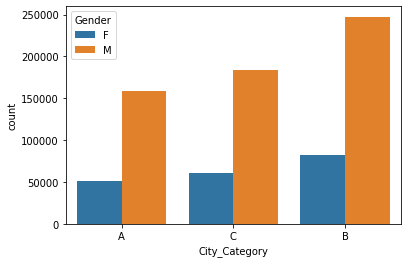

In [15]:
sns.countplot(data['City_Category'], hue=data['Gender'])

In [16]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [17]:
data["Product_Category_2"]= data["Product_Category_2"].fillna(-1.0).astype("float")
data["Product_Category_3"]= data["Product_Category_3"].fillna(-1.0).astype("float")

In [18]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
dtype: int64

In [19]:
data.Product_Category_1.value_counts().sort_values(ascending=True)

9        604
17       801
19      1603
14      2186
20      2550
18      4436
7       5345
12      5610
10      7373
13      7930
15      8984
16     13933
4      16756
3      28791
6      29326
2      34056
11     34440
8     162294
1     200699
5     215950
Name: Product_Category_1, dtype: int64

In [20]:
data.drop(data.index[(data.Product_Category_1.isin([19,20])) & (data.source == 'train')], inplace=True)

In [21]:
data.Product_ID = data.Product_ID.str.replace('P','')

In [22]:
data.Stay_In_Current_City_Years.value_counts()

1     274937
2     144599
3     134750
4+    120054
0     105174
Name: Stay_In_Current_City_Years, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779514 entries, 0 to 783666
Data columns (total 13 columns):
User_ID                       779514 non-null int64
Product_ID                    779514 non-null object
Gender                        779514 non-null object
Age                           779514 non-null object
Occupation                    779514 non-null int64
City_Category                 779514 non-null object
Stay_In_Current_City_Years    779514 non-null object
Marital_Status                779514 non-null int64
Product_Category_1            779514 non-null int64
Product_Category_2            779514 non-null float64
Product_Category_3            779514 non-null float64
Purchase                      545915 non-null float64
source                        779514 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 83.3+ MB


In [24]:
data.Age.value_counts()

26-35    311554
36-45    155898
18-25    141209
46-50     64902
51-55     54450
55+       30316
0-17      21185
Name: Age, dtype: int64

In [25]:
def age_convert(age):
    if age == '0-17':
        x=0
    elif age == '18-25':
        x=1
    elif age == '26-35':
        x=2
    elif age == '36-45':
        x=3
    elif age == '46-50':
        x=4
    elif age == '51-55':
        x=5
    elif age == '55+':
        x=6

    return x

In [26]:
data.Gender = data.Gender.map({'F':0,'M':1})
data.City_Category = data.City_Category.map({'A':int(1),'B':int(2),'C':int(3)})
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.map({'0':int(0), '1':int(1),'2':int(2),'3':int(3),'4+':int(4)})
data.Age = data.Age.apply(age_convert)

In [27]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,00069042,0,0,10,1,2,0,3,-1.0,-1.0,8370.0,train
1,1000001,00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0,train
2,1000001,00087842,0,0,10,1,2,0,12,-1.0,-1.0,1422.0,train
3,1000001,00085442,0,0,10,1,2,0,12,14.0,-1.0,1057.0,train
4,1000002,00285442,1,6,16,3,4,0,8,-1.0,-1.0,7969.0,train


In [28]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
dtype: int64

In [29]:
corr_data = data.corr()

In [30]:
corr_data

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.034722,0.032624,-0.024006,0.021690,-0.030070,0.020400,0.004609,0.003912,0.002390,0.004889
Gender,-0.034722,1.000000,-0.004730,0.116310,-0.003585,0.014988,-0.010899,-0.046423,-0.000008,0.035908,0.060204
Age,0.032624,-0.004730,1.000000,0.090951,0.123391,-0.005019,0.310724,0.060936,0.019302,-0.007777,0.017423
Occupation,-0.024006,0.116310,0.090951,1.000000,0.035226,0.028621,0.023564,-0.009164,0.007947,0.012696,0.021438
City_Category,0.021690,-0.003585,0.123391,0.035226,1.000000,0.020662,0.039976,-0.027185,0.021914,0.037718,0.068609
Stay_In_Current_City_Years,-0.030070,0.014988,-0.005019,0.028621,0.020662,1.000000,-0.012900,-0.003391,0.002196,0.001146,0.005323
Marital_Status,0.020400,-0.010899,0.310724,0.023564,0.039976,-0.012900,1.000000,0.020121,0.002646,-0.005603,-0.000302
Product_Category_1,0.004609,-0.046423,0.060936,-0.009164,-0.027185,-0.003391,0.020121,1.000000,-0.066296,-0.395155,-0.314083
Product_Category_2,0.003912,-0.000008,0.019302,0.007947,0.021914,0.002196,0.002646,-0.066296,1.000000,0.109343,0.051653
Product_Category_3,0.002390,0.035908,-0.007777,0.012696,0.037718,0.001146,-0.005603,-0.395155,0.109343,1.000000,0.287038


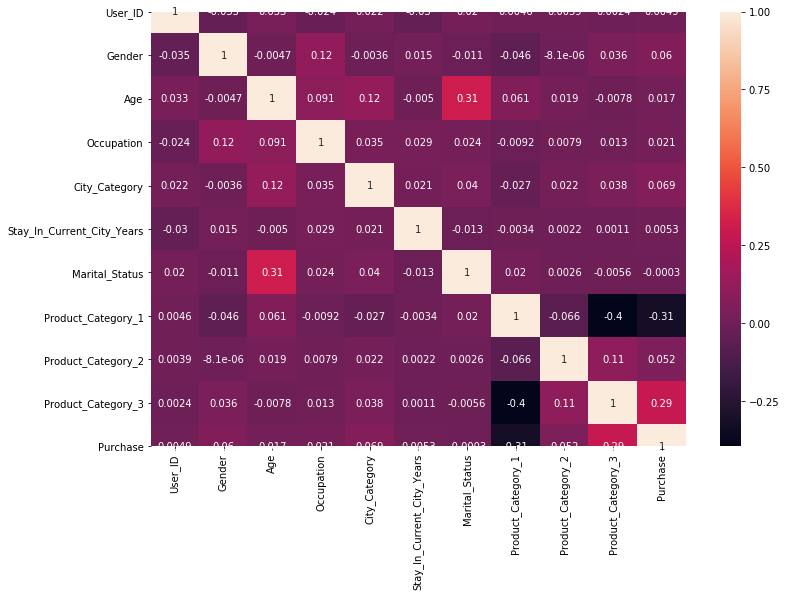

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_data, annot=True, cmap=None, )

In [32]:
final_train = data.loc[data['source'] == 'train']
final_test = data.loc[data['source'] == 'test']

In [33]:
final_train.drop('source', axis=1, inplace=True)
final_test.drop('source', axis=1, inplace=True)

C:\Users\dipkumar\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
final_train.shape, final_test.shape

((545915, 12), (233599, 12))

In [35]:
final_test.drop('Purchase', axis=1, inplace=True)
final_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
550068,1000004,00128942,1,4,7,2,2,1,1,11.0,-1.0
550069,1000009,00113442,1,2,17,3,0,0,3,5.0,-1.0
550070,1000010,00288442,0,3,1,2,4,1,5,14.0,-1.0
550071,1000010,00145342,0,3,1,2,4,1,4,9.0,-1.0
550072,1000011,00053842,0,2,1,3,1,0,4,5.0,12.0


In [36]:
final_train.to_csv('modified_train.csv')
final_test.to_csv('modified_test.csv')

In [37]:
df_train = pd.read_csv('modified_train.csv')
df_test = pd.read_csv('modified_test.csv')

In [38]:
df_train.shape, df_test.shape

((545915, 13), (233599, 12))

In [39]:
target = 'Purchase'
IDcols = ['User_ID','Product_ID']

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
# Prepare X and y

In [42]:
X = df_train.drop(['User_ID','Purchase', 'Product_ID'], axis=1)
y = df_train['Purchase']

X.shape, y.shape

((545915, 10), (545915,))

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436732, 10), (109183, 10), (436732,), (109183,))

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [46]:
# Lets build out model using Random Forest

In [47]:
rf = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#cv_score = cross_val_score(rf, X_train, y_train, cv=20, scoring='neg_mean_squared_error', )
#print(cv_score)

In [48]:
X_test.head()

,Unnamed: 0,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
278863,278863,1,3,0,2,2,0,8,-1.0,-1.0
469891,469891,1,2,4,1,0,0,11,-1.0,-1.0
182519,182519,1,3,17,2,2,0,8,15.0,-1.0
467871,467871,1,4,1,3,4,1,5,-1.0,-1.0
197049,197049,1,2,17,1,3,0,1,8.0,17.0


In [49]:
df_test.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,550068,1000004,128942,1,4,7,2,2,1,1,11.0,-1.0
1,550069,1000009,113442,1,2,17,3,0,0,3,5.0,-1.0
2,550070,1000010,288442,0,3,1,2,4,1,5,14.0,-1.0
3,550071,1000010,145342,0,3,1,2,4,1,4,9.0,-1.0
4,550072,1000011,53842,0,2,1,3,1,0,4,5.0,12.0


In [50]:
mse = mean_squared_error(y_test, y_pred)

In [51]:
mse

9454881.51445179

In [52]:
rmse = np.sqrt(mse)
rmse

3074.8791056644473

In [53]:
np.std(X)

Unnamed: 0                    157592.086102
Gender                             0.431045
Age                                1.352461
Occupation                         6.524296
City_Category                      0.759699
Stay_In_Current_City_Years         1.289588
Marital_Status                     0.491761
Product_Category_1                 3.749939
Product_Category_2                 6.557932
Product_Category_3                 6.696570
dtype: float64

In [54]:
df_test.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,550068,1000004,128942,1,4,7,2,2,1,1,11.0,-1.0
1,550069,1000009,113442,1,2,17,3,0,0,3,5.0,-1.0
2,550070,1000010,288442,0,3,1,2,4,1,5,14.0,-1.0
3,550071,1000010,145342,0,3,1,2,4,1,4,9.0,-1.0
4,550072,1000011,53842,0,2,1,3,1,0,4,5.0,12.0


In [55]:
df_test['Final'] = rf.predict(df_test.drop(['User_ID','Product_ID'], axis=1))

In [56]:
#df_test['comb'] = df_test['User_ID'].map(str).str.cat(df_test['Product_ID'].map(str), sep='P')

df_test.rename(columns={'Final':'Purchase'}, inplace=True)

In [57]:
df_test.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,550068,1000004,128942,1,4,7,2,2,1,1,11.0,-1.0,14370.97
1,550069,1000009,113442,1,2,17,3,0,0,3,5.0,-1.0,9652.14
2,550070,1000010,288442,0,3,1,2,4,1,5,14.0,-1.0,6479.05
3,550071,1000010,145342,0,3,1,2,4,1,4,9.0,-1.0,1798.47
4,550072,1000011,53842,0,2,1,3,1,0,4,5.0,12.0,2712.30


In [58]:
#Export submission file:
IDcol = ['User_ID','Product_ID','Purchase']
submission = pd.DataFrame({ x: df_test[x] for x in IDcol})
submission.to_csv('submission_black_friday.csv', index=False)

In [59]:
# Check the generated file

sub = pd.read_csv('submission_black_friday.csv')
sub.head()

,User_ID,Product_ID,Purchase
0,1000004,128942,14370.97
1,1000009,113442,9652.14
2,1000010,288442,6479.05
3,1000010,145342,1798.47
4,1000011,53842,2712.30
